In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

c:\Users\gq121\Desktop\INFO_550\INFO_550_Object_detection\ODenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\gq121/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-4-4 torch 1.11.0+cpu CPU

Fusing layers... 
YOLOv5s_v6 summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [6]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 1 tie
Speed: 602.0ms pre-process, 168.6ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


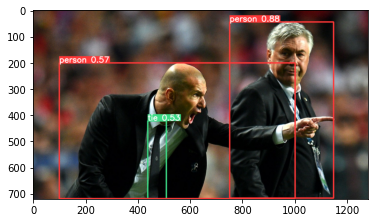

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [10]:
import uuid   # Unique identifier
import os
import time

In [11]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['number1', 'number2']
number_imgs = 5

In [15]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)


        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [16]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\number1.f7d12484-b4a4-11ec-a8cd-cc2f71f22c80.jpg


In [17]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\number1.fd77da8f-b4a4-11ec-b934-cc2f71f22c80.jpg
data\images\number1.fd77da90-b4a4-11ec-a873-cc2f71f22c80.jpg
data\images\number1.fd77da91-b4a4-11ec-ac2c-cc2f71f22c80.jpg
data\images\number1.fd77da92-b4a4-11ec-be42-cc2f71f22c80.jpg
data\images\number1.fd77da93-b4a4-11ec-b629-cc2f71f22c80.jpg
data\images\number2.fd7801ad-b4a4-11ec-8028-cc2f71f22c80.jpg
data\images\number2.fd7801ae-b4a4-11ec-96f0-cc2f71f22c80.jpg
data\images\number2.fd7801af-b4a4-11ec-abf4-cc2f71f22c80.jpg
data\images\number2.fd7801b0-b4a4-11ec-b29d-cc2f71f22c80.jpg
data\images\number2.fd7801b1-b4a4-11ec-9468-cc2f71f22c80.jpg


In [18]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [20]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\gq121/.cache\torch\hub\master.zip
YOLOv5  2022-4-4 torch 1.11.0+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [21]:
img = os.path.join('data', 'images', 'number1.d7a2fc66-b4a4-11ec-8cf3-cc2f71f22c80.jpg')

In [22]:
results = model(img)

In [23]:
results.print()

image 1/1: 480x640 1 number1
Speed: 9.6ms pre-process, 220.3ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)


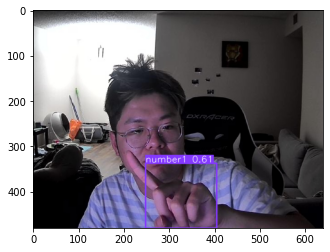

In [24]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [25]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()